Improved cnn model

In [ ]:
# 1. IMPORTS
# ----------------------------------------
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    BatchNormalization
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# 2. DATASET PATH & PARAMETERS
# ----------------------------------------
DATASET_DIR = "/content/drive/MyDrive/irmas_mels"
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32
EPOCHS = 20

In [ ]:
# 3. IMAGE DATA GENERATORS
# ----------------------------------------
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 5367 images belonging to 11 classes.
Found 1338 images belonging to 11 classes.


In [ ]:
# 4. IMPROVED CNN ARCHITECTURE
# ----------------------------------------
model = Sequential([

    Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    # Block 1
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.1),  # light dropout

    # Block 2
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    # Block 3 (deeper)
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    # Block 4 (new)
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    # Fully connected layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),

    # Output
    Dense(11, activation='softmax')
])

In [ ]:
# 5. COMPILE MODEL
# ----------------------------------------
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,587,723 (17.50 MB)

 Trainable params: 4,586,763 (17.50 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
# 6. CALLBACKS
# ----------------------------------------
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint("/content/drive/MyDrive/improved_cnn_model.keras",
                    monitor='val_loss', save_best_only=True)
]

In [ ]:
# 7. TRAINING
# ----------------------------------------
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 33s 193ms/step - accuracy: 0.5738 - loss: 1.2565 - val_accuracy: 0.4709 - val_loss: 1.6341
Epoch 2/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 32s 190ms/step - accuracy: 0.5996 - loss: 1.2032 - val_accuracy: 0.4185 - val_loss: 1.7694
Epoch 3/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 32s 190ms/step - accuracy: 0.5995 - loss: 1.1856 - val_accuracy: 0.5022 - val_loss: 1.5457
Epoch 4/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 34s 201ms/step - accuracy: 0.6299 - loss: 1.0846 - val_accuracy: 0.5120 - val_loss: 1.5036
Epoch 5/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 41s 201ms/step - accuracy: 0.6546 - loss: 1.0187 - val_accuracy: 0.5075 - val_loss: 1.5851
Epoch 6/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 31s 187ms/step - accuracy: 0.6714 - loss: 0.9769 - val_accuracy: 0.4716 - val_loss: 1.7715
Epoch 7/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 32s 188ms/step - accuracy: 0.6824 - loss: 0.9204 - val_accuracy: 0.5404 - val_loss: 1.4397
Epoch 8/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 47s 221ms/step - accuracy: 0.7107 - loss: 0

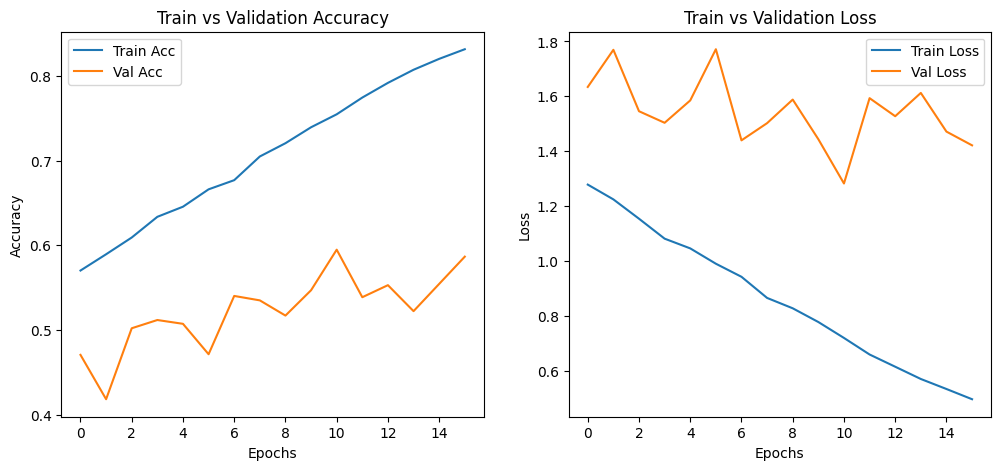

In [ ]:
# 8. PLOT ACCURACY AND LOSS
# ----------------------------------------
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()

plt.show()